# Future Forecasting of COVID-19
In this analysis, primary goal is to predict the spread of COVID-19 in Global and in USA states. Data is consumed from official Johns Hopkins University github repo. This data contains daily case reports from whole globe. 


In [ ]:
#Imports all required libraries 

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [6]:
#Read datasets

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
print(confirmed_df.shape)

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
print(deaths_df.shape)

recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print(recoveries_df.shape)


(253, 71)
(253, 71)
(239, 71)


In [1]:
#confirmed_df.columns
#deaths_df.columns
#recoveries_df.columns

In [7]:
cols = confirmed_df.keys()

In [8]:
#Get all the dates for the outbreak in the dataset

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [9]:
#list out all dates which has data for confirmed cases
#confirmed.columns

In [10]:
#list out all dates which has data for deaths cases
#deaths.columns

In [4]:
##list out all dates which has data for recovered cases
#recoveries.columns

In [11]:

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())

In [12]:
#Getting daily increases

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)

In [13]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Exploratory data analysis 

In [12]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [13]:
#Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

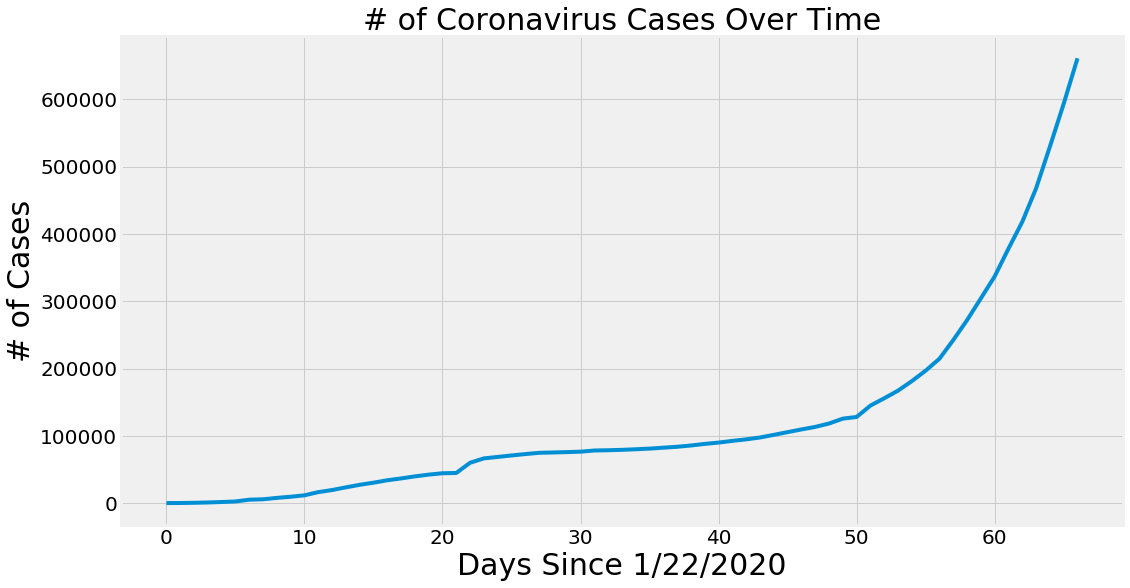

In [14]:
# of corona virus cases over time

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [15]:
#why log scales (Logarithmic Scales) are useful in comparison to normal count

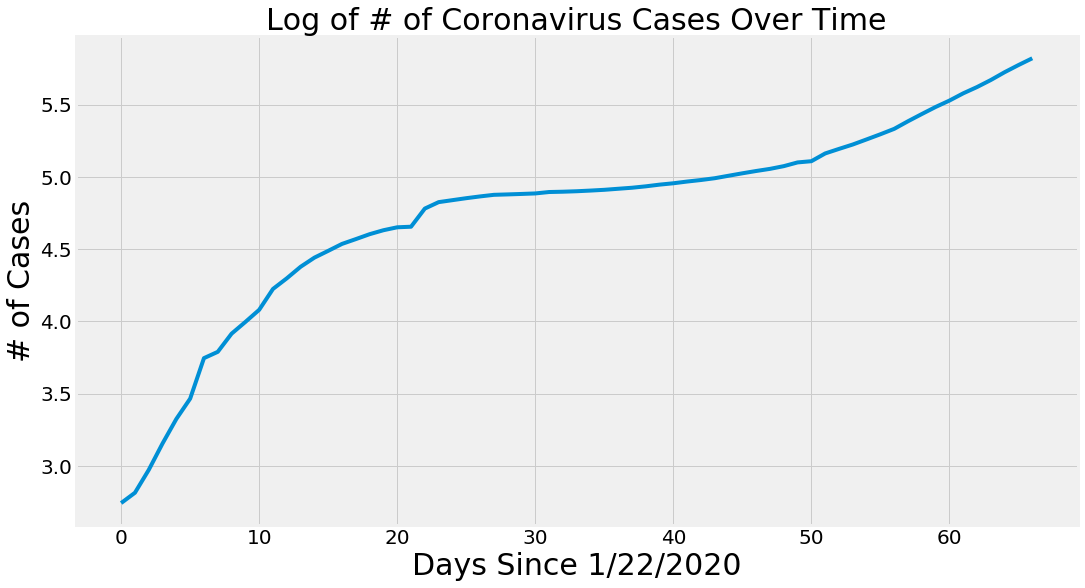

In [16]:
# Log of # of corona virus cases over time
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

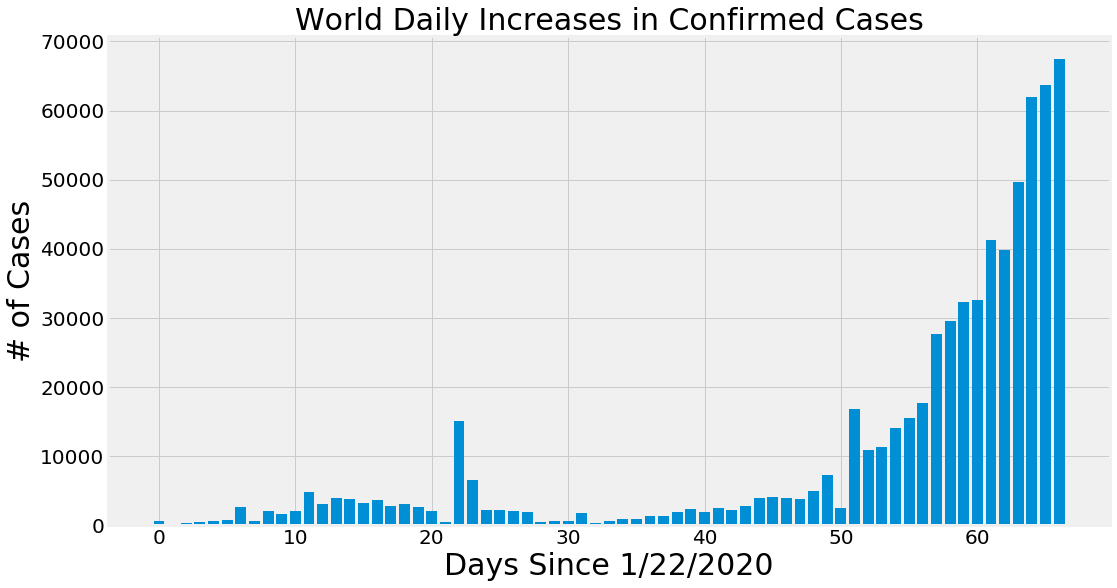

In [17]:
# World daily increase in confirmed cases
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [18]:
#actual China numbers
#https://www.themorningbulletin.com.au/news/deleted-pic-claims-10-fold-virus-increase/3937698/

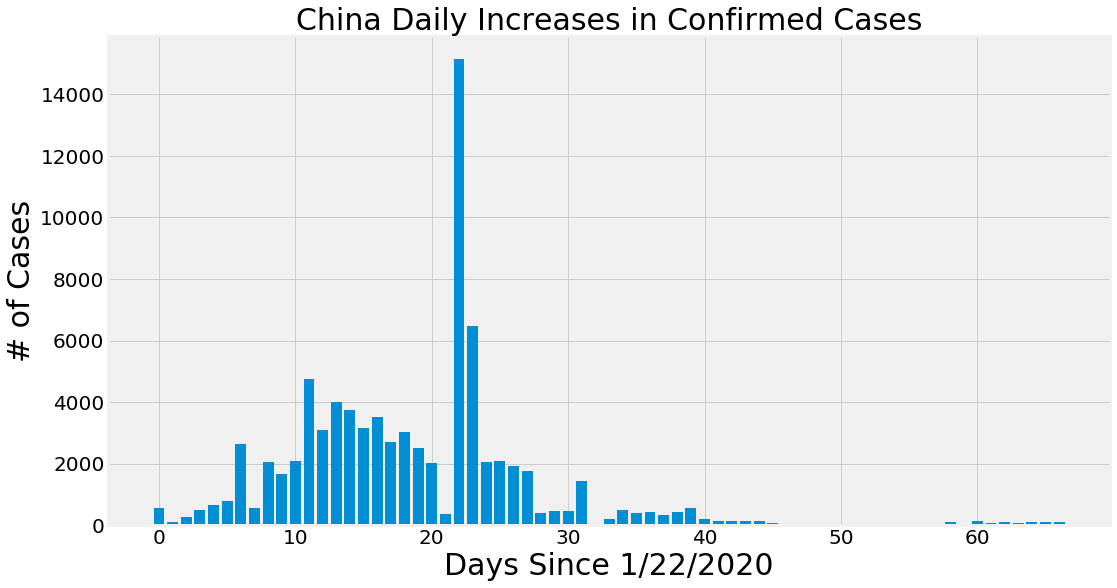

In [19]:
# China daily increase in confirmed cases
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

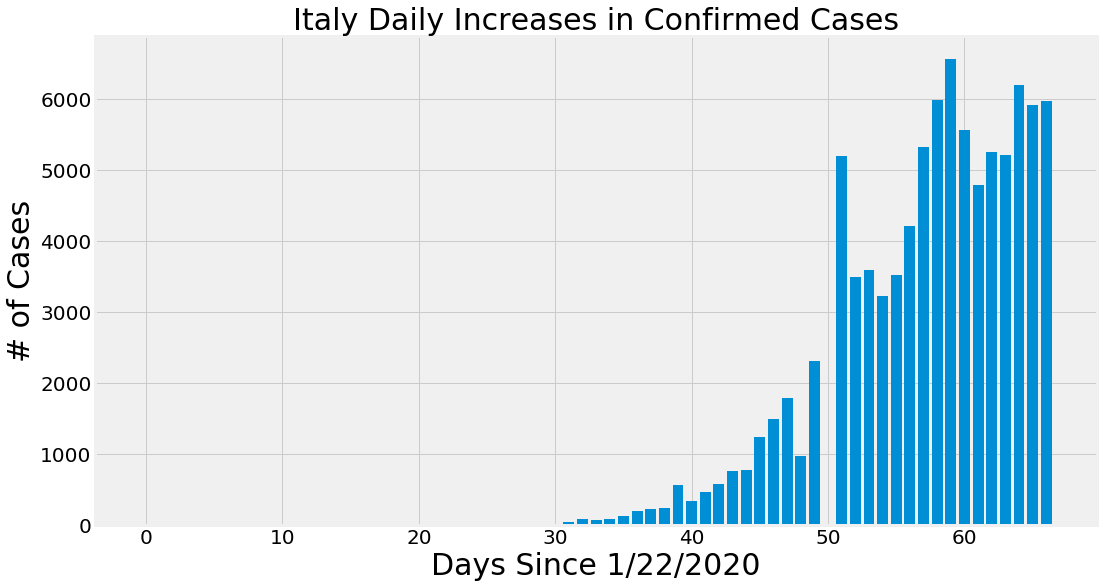

In [20]:
# Italy daily increase in confirmed cases
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [21]:
#check for peak cases - after that notice drop in number of cases

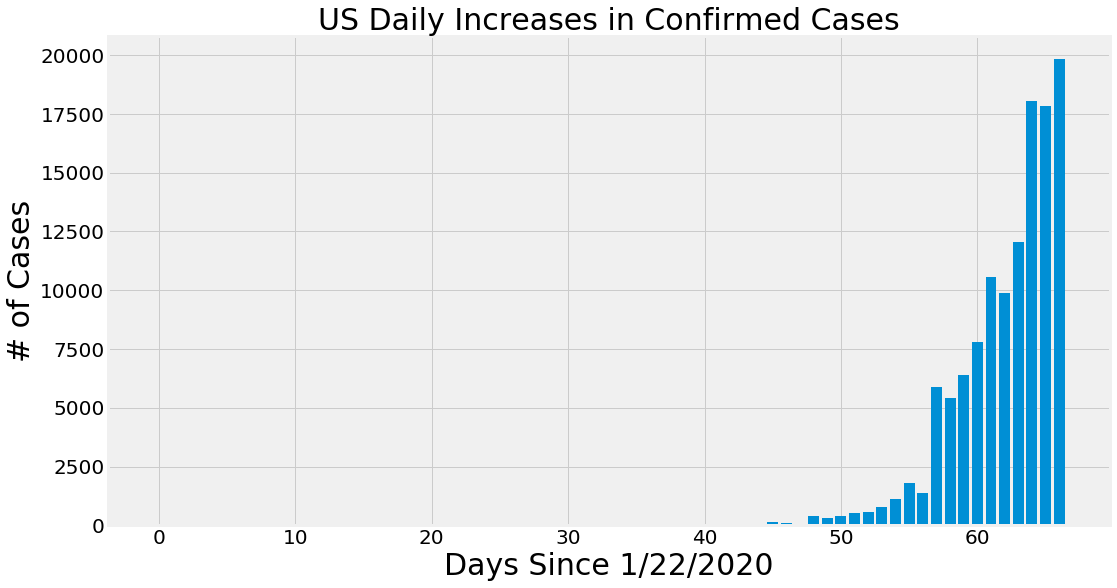

In [22]:
# USA daily increased in confirmed cases
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

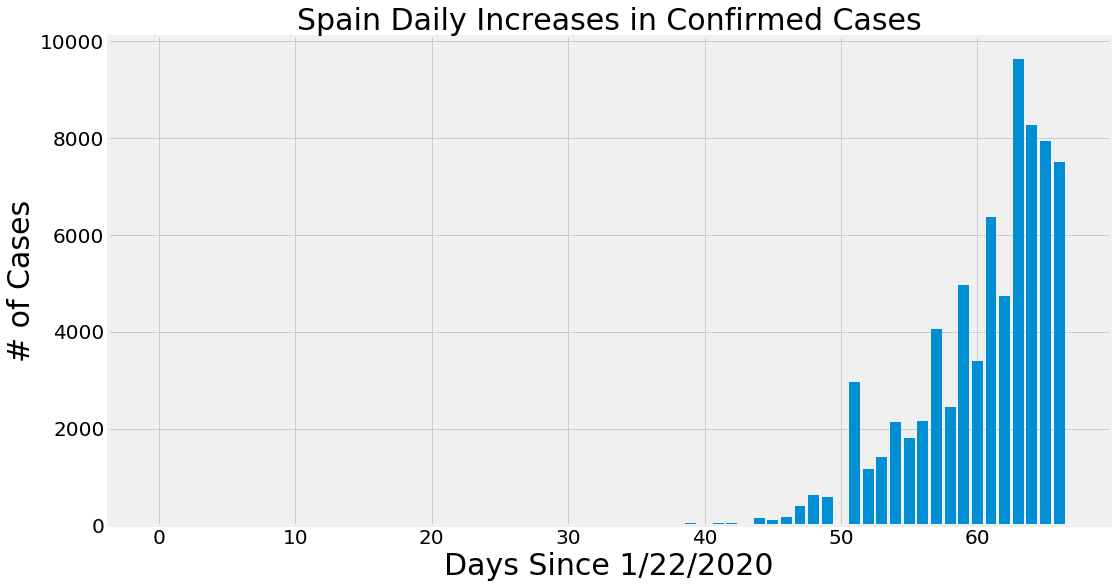

In [23]:
#Spain daily increase in confirmed cases
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

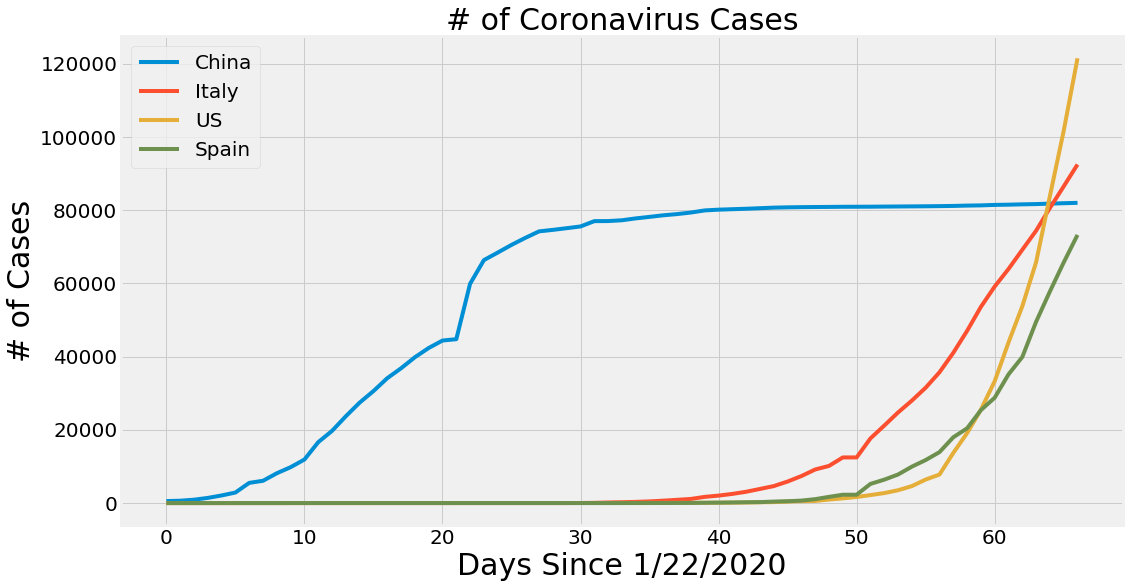

In [24]:
# of corona virus cases

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#USA state wise distribution of cases / each day 


In [76]:
#USA state wise distribution

states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
print(states_df.shape)

print(states_df.columns)

(1386, 5)
Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')


In [75]:
states_df[states_df['date'] == '2020-03-27'].sort_values('cases', axis=0, ascending=False)['state'].tolist()

['New York',
 'New Jersey',
 'California',
 'Washington',
 'Michigan',
 'Massachusetts',
 'Florida',
 'Illinois',
 'Louisiana',
 'Pennsylvania',
 'Georgia',
 'Texas',
 'Colorado',
 'Connecticut',
 'Ohio',
 'Tennessee',
 'Indiana',
 'Wisconsin',
 'North Carolina',
 'Maryland',
 'Missouri',
 'Arizona',
 'Alabama',
 'Nevada',
 'Virginia',
 'Mississippi',
 'South Carolina',
 'Utah',
 'Oregon',
 'Minnesota',
 'Arkansas',
 'Oklahoma',
 'District of Columbia',
 'Kentucky',
 'Iowa',
 'Idaho',
 'Kansas',
 'Rhode Island',
 'New Mexico',
 'New Hampshire',
 'Vermont',
 'Maine',
 'Delaware',
 'Montana',
 'Hawaii',
 'Nebraska',
 'West Virginia',
 'Alaska',
 'Wyoming',
 'North Dakota',
 'South Dakota']

In [97]:
#Filter for top 10 states with the highest case count - 
# states = ['New York',
#  'New Jersey',
#  'California',
#  'Washington',
#  'Michigan',
#  'Massachusetts',
#  'Florida',
#  'Illinois',
#  'Louisiana',
#  'Pennsylvania',
#  'Georgia',
#  'Texas',
#  'Colorado']


_ny_dates = len(states_df[states_df['state'] == 'New York']['date'].tolist())
_ny_dates = adjusted_dates[0:_ny_dates]
_new_york_cases = states_df[states_df['state'] == 'New York']['cases'].tolist()

_new_jersey_cases = states_df[states_df['state'] == 'New Jersey']['cases'].tolist()

_nj_dates = len(states_df[states_df['state'] == 'New Jersey']['date'].tolist())
_nj_dates = adjusted_dates[0:_nj_dates]

_california_dates = len(states_df[states_df['state'] == 'California']['date'].tolist())
_california_dates = adjusted_dates[0:_california_dates]

_california_cases = states_df[states_df['state'] == 'California']['cases'].tolist()

_Washington_dates = len(states_df[states_df['state'] == 'Washington']['date'].tolist())


_Washington_dates = adjusted_dates[0:_Washington_dates]
_washington_cases = states_df[states_df['state'] == 'Washington']['cases'].tolist()

_Michigan_dates = len(states_df[states_df['state'] == 'Michigan']['date'].tolist())


_Michigan_dates = adjusted_dates[0:_Michigan_dates]
_Michigan_cases = states_df[states_df['state'] == 'Michigan']['cases'].tolist()

_Massachusetts_dates = len(states_df[states_df['state'] == 'Massachusetts']['date'].tolist())
_Massachusetts_dates = adjusted_dates[0:_Massachusetts_dates]
_Massachusetts_cases = states_df[states_df['state'] == 'Massachusetts']['cases'].tolist()

_Florida_dates = len(states_df[states_df['state'] == 'Florida']['date'].tolist())
_Florida_dates = adjusted_dates[0:_Florida_dates]
_Florida_cases = states_df[states_df['state'] == 'Florida']['cases'].tolist()


_Illinois_dates = len(states_df[states_df['state'] == 'Illinois']['date'].tolist())
_Illinois_dates = adjusted_dates[0:_Illinois_dates]
_Illinois_cases = states_df[states_df['state'] == 'Illinois']['cases'].tolist()


_Louisiana_cases = states_df[states_df['state'] == 'Louisiana']['cases'].tolist()
_Pennsylvania_cases = states_df[states_df['state'] == 'Pennsylvania']['cases'].tolist()
_Georgia_cases = states_df[states_df['state'] == 'Georgia']['cases'].tolist()
_Texas_cases = states_df[states_df['state'] == 'Texas']['cases'].tolist()
_Colorado_cases = states_df[states_df['state'] == 'Colorado']['cases'].tolist()

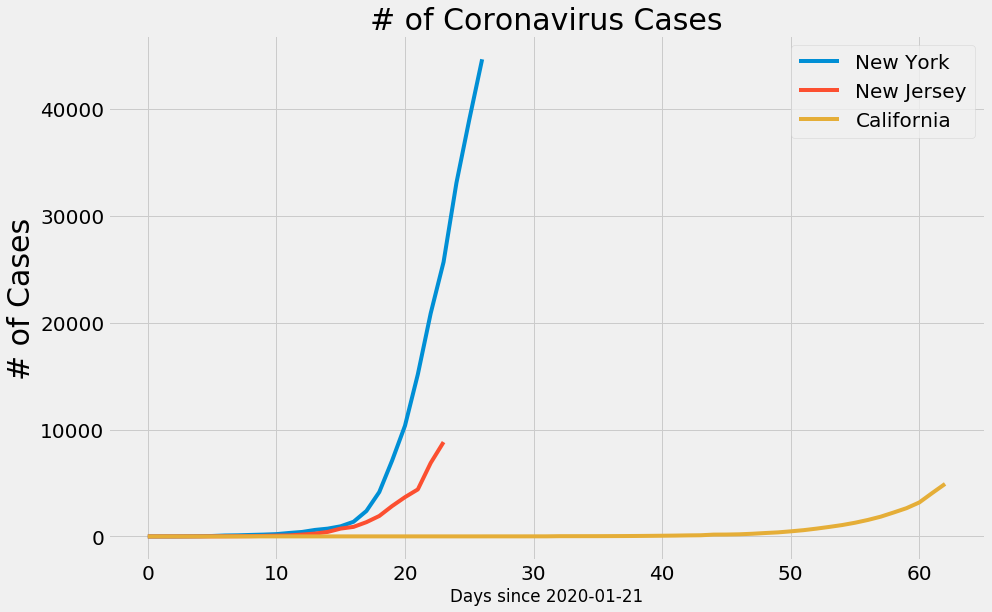

In [98]:
# of corona virus cases

plt.style.use('fivethirtyeight')


plt.figure(figsize=(14, 9))
plt.plot(_ny_dates, _new_york_cases)
plt.plot(_nj_dates, _new_jersey_cases)



plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days since 2020-01-21')
plt.ylabel('# of Cases', size=30)
plt.legend(['New York', 'New Jersey', ], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

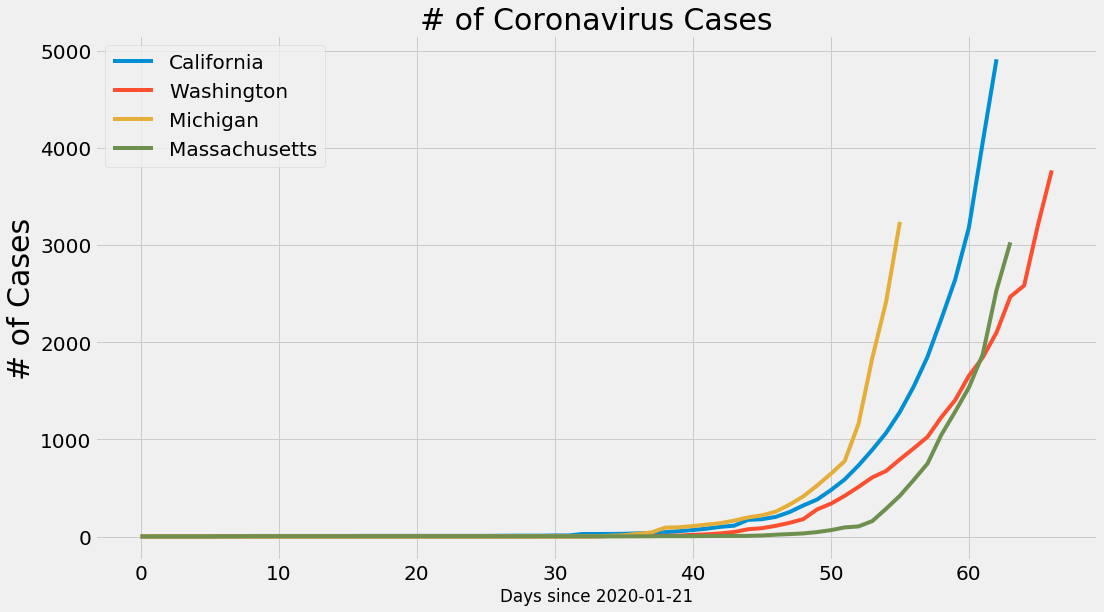

In [101]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16, 9))


plt.plot(_california_dates, _california_cases)


plt.plot(_Washington_dates, _washington_cases)
# plt.plot(_Michigan_dates, _Michigan_cases)
plt.plot(_Massachusetts_dates, _Massachusetts_cases)

# plt.plot(_Florida_dates, _Florida_cases)
plt.plot(_Illinois_dates, _Illinois_cases)

plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days since 2020-01-21')
plt.ylabel('# of Cases', size=30)
plt.legend(['California', 'Washington','Michigan','Massachusetts', 'Florida', 'Illinois'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

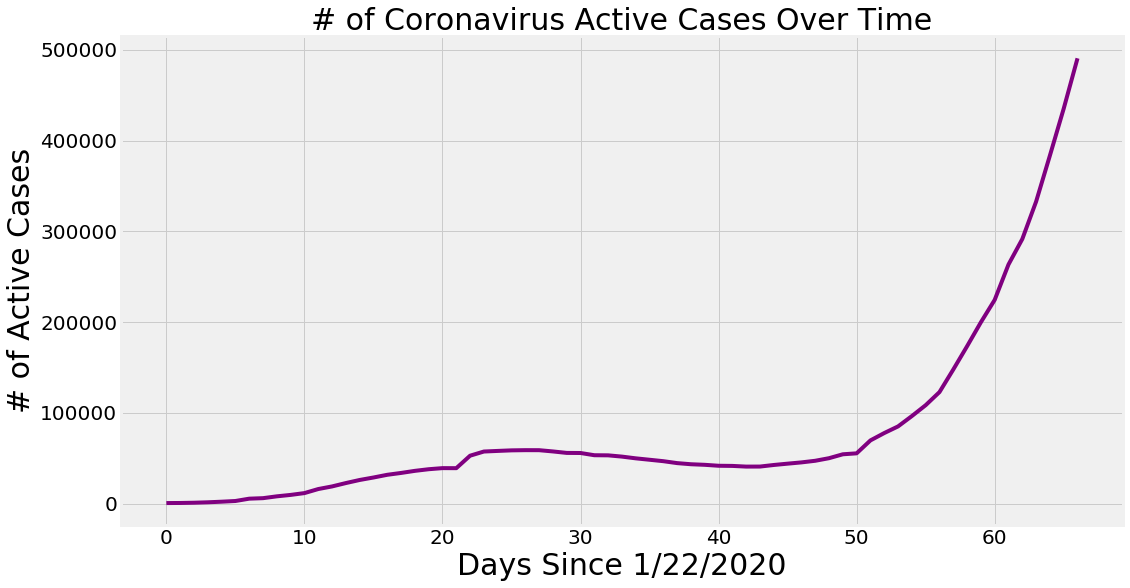

In [25]:
# of active cases over time

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active, color='purple')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

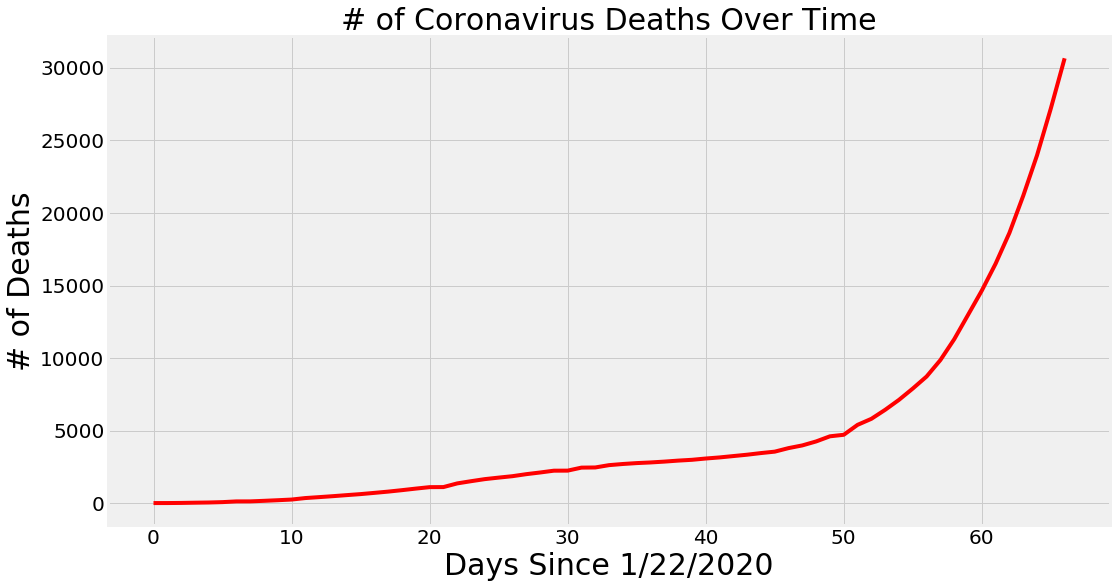

In [26]:
# of corona deaths over time

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [27]:
# total number of corona +ve cases / number of deaths

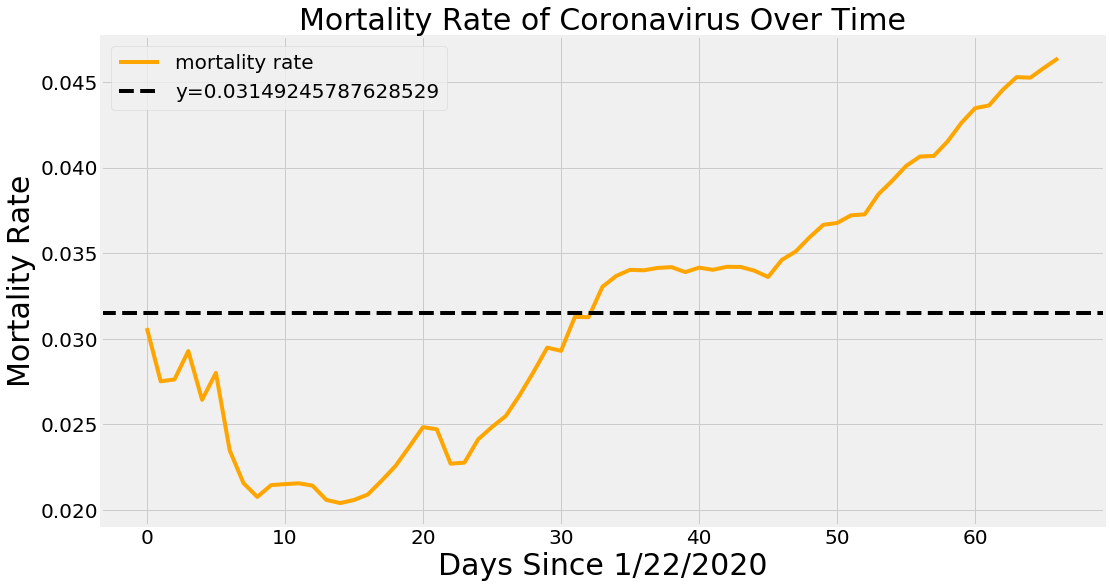

In [28]:
#Mortality of corona virus cases over time

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

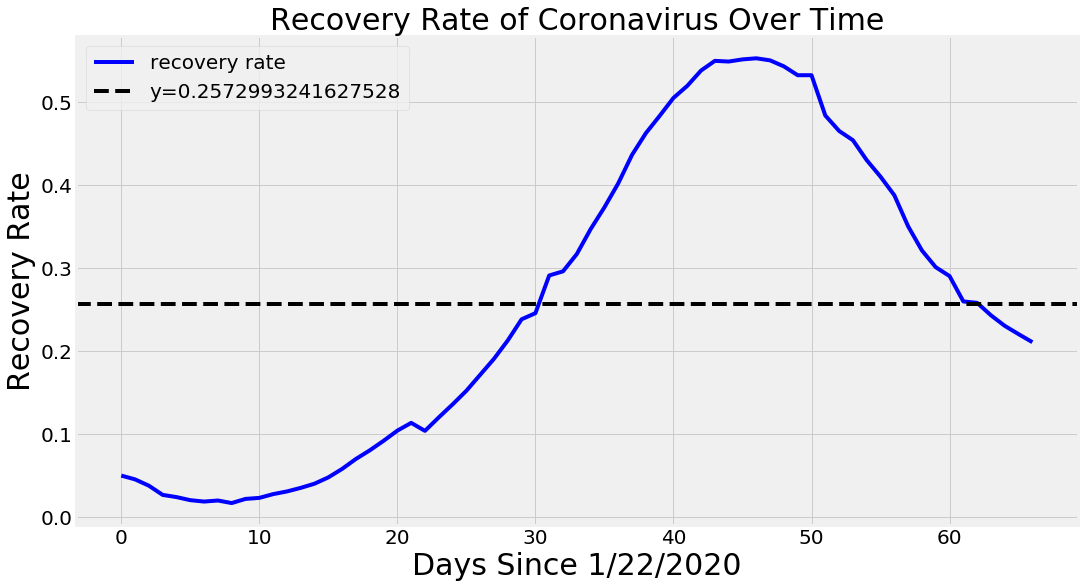

In [29]:
#Recovery rate of corona cases over time

mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [30]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [31]:
#Getting information about countries/regions that have confirmed coronavirus cases

unique_countries =  list(confirmed_df['Country/Region'].unique())

In [32]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [33]:
unique_countries

['US',
 'Italy',
 'China',
 'Spain',
 'Germany',
 'France',
 'Iran',
 'United Kingdom',
 'Switzerland',
 'Netherlands',
 'Korea, South',
 'Belgium',
 'Austria',
 'Turkey',
 'Canada',
 'Portugal',
 'Norway',
 'Brazil',
 'Australia',
 'Israel',
 'Sweden',
 'Czechia',
 'Ireland',
 'Denmark',
 'Malaysia',
 'Chile',
 'Luxembourg',
 'Ecuador',
 'Japan',
 'Poland',
 'Pakistan',
 'Romania',
 'Russia',
 'Thailand',
 'Saudi Arabia',
 'South Africa',
 'Finland',
 'Indonesia',
 'Philippines',
 'Greece',
 'India',
 'Iceland',
 'Singapore',
 'Panama',
 'Dominican Republic',
 'Mexico',
 'Diamond Princess',
 'Argentina',
 'Slovenia',
 'Peru',
 'Serbia',
 'Croatia',
 'Estonia',
 'Colombia',
 'Qatar',
 'Egypt',
 'Iraq',
 'Bahrain',
 'United Arab Emirates',
 'Algeria',
 'New Zealand',
 'Lebanon',
 'Armenia',
 'Morocco',
 'Lithuania',
 'Ukraine',
 'Hungary',
 'Bulgaria',
 'Andorra',
 'Latvia',
 'Costa Rica',
 'Slovakia',
 'Taiwan*',
 'Tunisia',
 'Uruguay',
 'Bosnia and Herzegovina',
 'Jordan',
 'North Mac

In [34]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 121478 cases
Italy: 92472 cases
China: 81999 cases
Spain: 73235 cases
Germany: 57695 cases
France: 38105 cases
Iran: 35408 cases
United Kingdom: 17312 cases
Switzerland: 14076 cases
Netherlands: 9819 cases
Korea, South: 9478 cases
Belgium: 9134 cases
Austria: 8271 cases
Turkey: 7402 cases
Canada: 5576 cases
Portugal: 5170 cases
Norway: 4015 cases
Brazil: 3904 cases
Australia: 3640 cases
Israel: 3619 cases
Sweden: 3447 cases
Czechia: 2631 cases
Ireland: 2415 cases
Denmark: 2366 cases
Malaysia: 2320 cases
Chile: 1909 cases
Luxembourg: 1831 cases
Ecuador: 1823 cases
Japan: 1693 cases
Poland: 1638 cases
Pakistan: 1495 cases
Romania: 1452 cases
Russia: 1264 cases
Thailand: 1245 cases
Saudi Arabia: 1203 cases
South Africa: 1187 cases
Finland: 1167 cases
Indonesia: 1155 cases
Philippines: 1075 cases
Greece: 1061 cases
India: 987 cases
Iceland: 963 cases
Singapore: 802 cases
Panama: 786 cases
Dominican Republic: 719 cases
Mexico: 717 cases
Diamond Prin

In [35]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

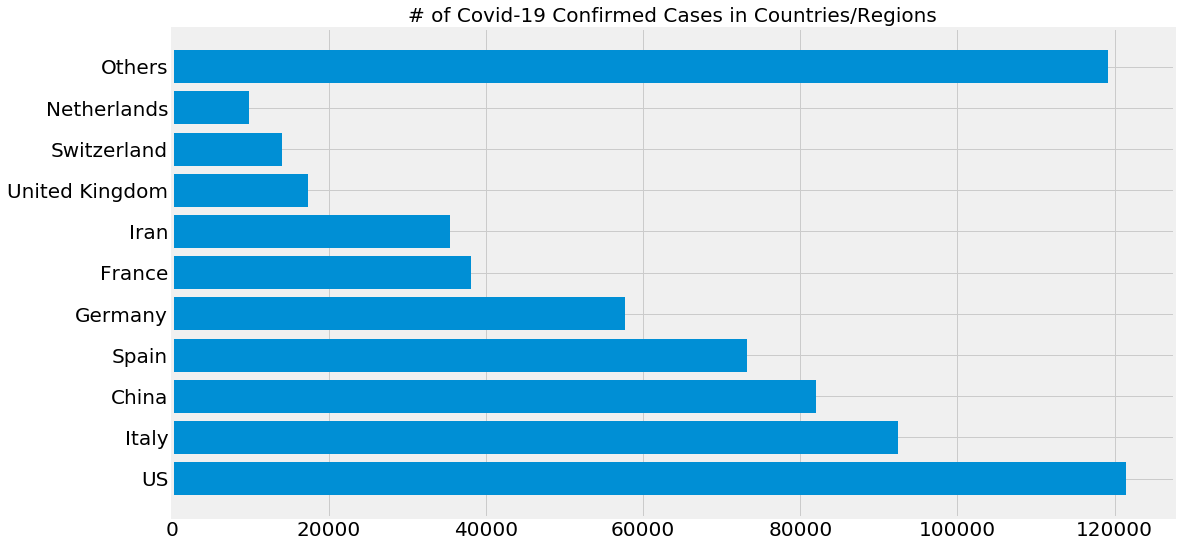

In [36]:
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

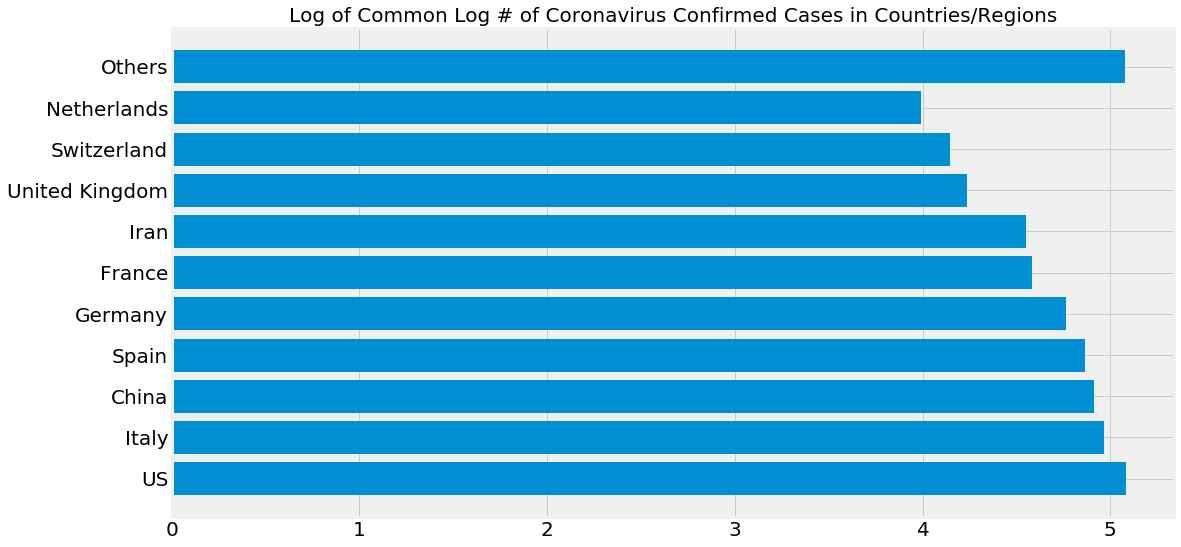

In [37]:
# lets look at it in a logarithmic scale 
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, log_country_confirmed_cases)
plt.title('Log of Common Log # of Coronavirus Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

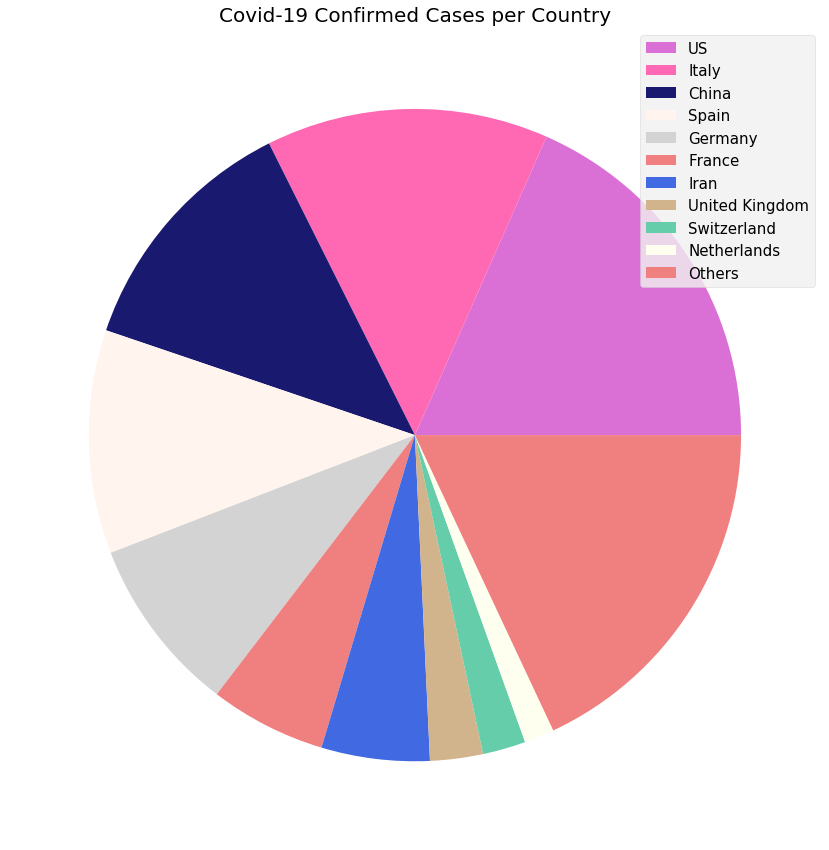

In [38]:
# COVID 19 - confirmed cases per country

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases per Country', size=20)
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best', fontsize=15)
plt.show()

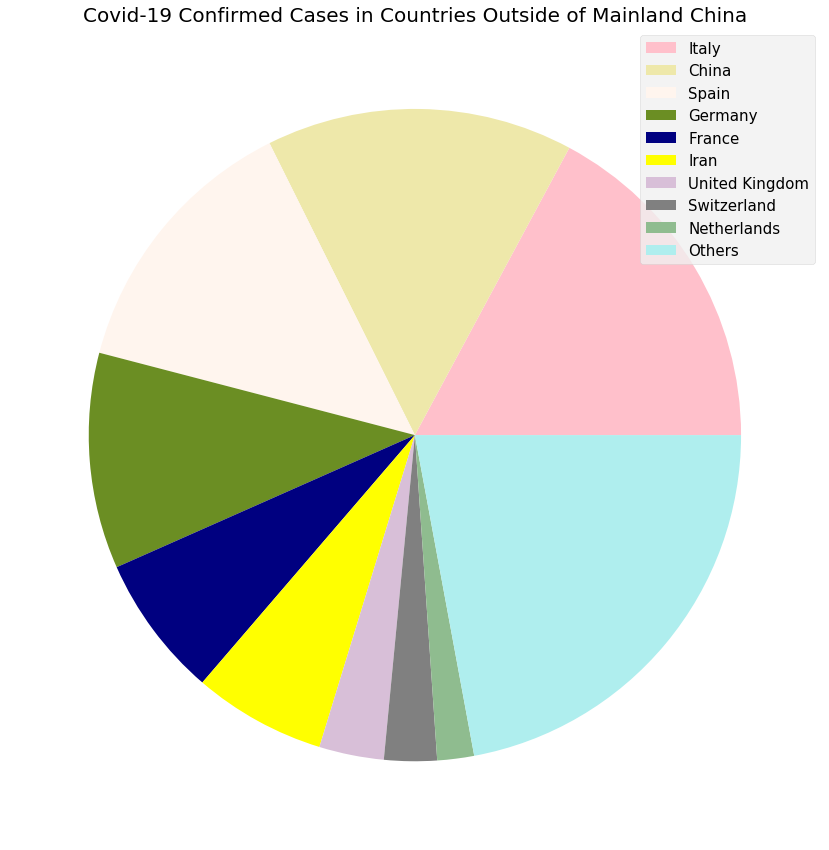

In [39]:
# COVID 19 confirmed cases in countries outside of mainland china

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,15))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China', size=20)
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best', fontsize=15)
plt.show()


In [51]:
world_cases

array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97886],
       [101801],
       [105847],
       [109821],
       [113590],
       [118620],
       [125875],
       [128352],
       [145205],
       [156101],
       [167454],
       [181574],
       [197102],
       [214821],
       [242500],
       [272035

In [50]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 5525.274087767801
MSE: 55236073.425823845


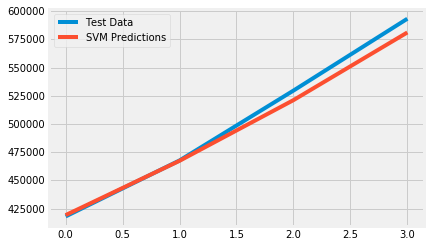

In [40]:
#Future Forecasting

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

#Convert integer into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False) 


#Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example.

# use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5, 6, 7]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

# svm_search.best_params_

# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))



In [41]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))



MAE: 3589.094006188214
MSE: 13914858.468481


[[ 2.82007283e+03 -2.10750169e+03  4.57437901e+02 -1.64622298e+01
   3.12692732e-01 -4.64080280e-03  4.12811864e-05]]


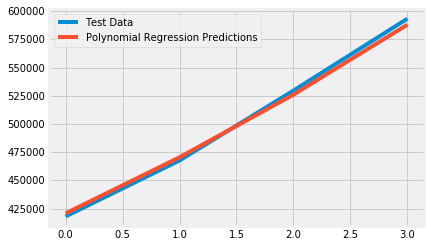

In [42]:
print(linear_model.coef_)

plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])



In [43]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

bayesian_search.best_params_

bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))



Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 71754.69501335552
MSE: 5790996583.677071


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.0s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


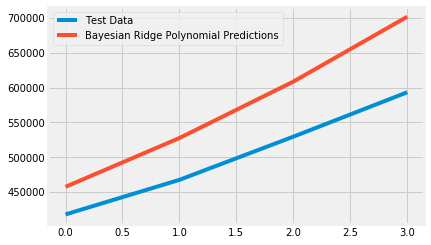

In [44]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

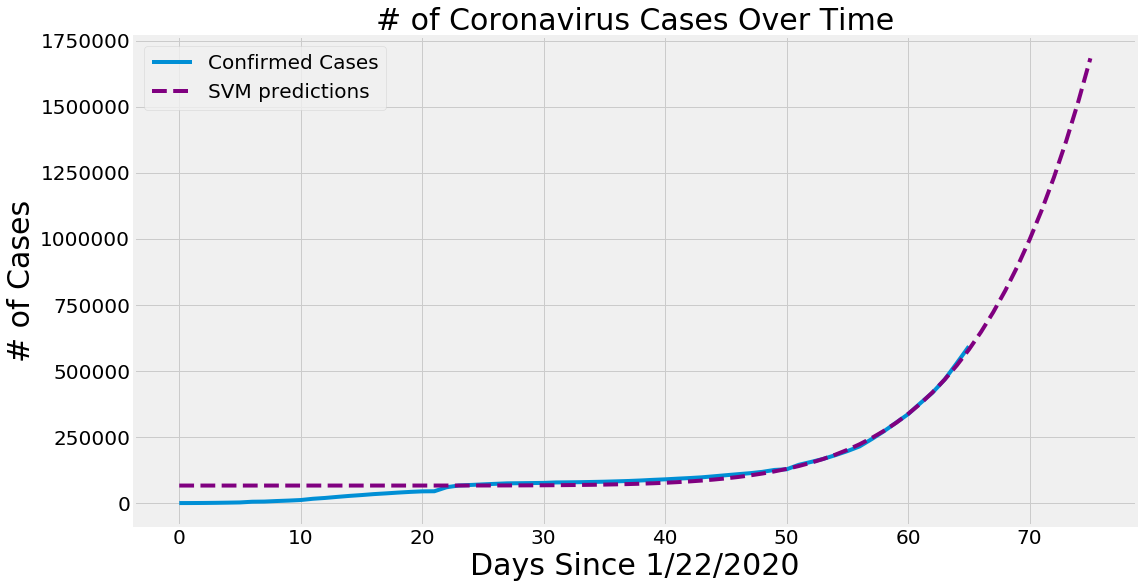

In [45]:
# of corona virus cases over time + including model predictions

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


In [46]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))


SVM future predictions:


{('03/28/2020', 647952.0),
 ('03/29/2020', 722249.0),
 ('03/30/2020', 804728.0),
 ('03/31/2020', 896149.0),
 ('04/01/2020', 997331.0),
 ('04/02/2020', 1109152.0),
 ('04/03/2020', 1232560.0),
 ('04/04/2020', 1368567.0),
 ('04/05/2020', 1518260.0),
 ('04/06/2020', 1682804.0)}

In [47]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))


Polynomial regression future predictions:


{('03/28/2020', 656986.0),
 ('03/29/2020', 733501.0),
 ('03/30/2020', 818200.0),
 ('03/31/2020', 911746.0),
 ('04/01/2020', 1014841.0),
 ('04/02/2020', 1128226.0),
 ('04/03/2020', 1252682.0),
 ('04/04/2020', 1389035.0),
 ('04/05/2020', 1538155.0),
 ('04/06/2020', 1700958.0)}

In [48]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))


Ridge regression future predictions:


{('03/28/2020', 808366.0),
 ('03/29/2020', 929977.0),
 ('03/30/2020', 1068085.0),
 ('03/31/2020', 1224336.0),
 ('04/01/2020', 1400488.0),
 ('04/02/2020', 1598415.0),
 ('04/03/2020', 1820112.0),
 ('04/04/2020', 2067701.0),
 ('04/05/2020', 2343433.0),
 ('04/06/2020', 2649699.0)}